In [1]:
##importo le librerie

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
#definisco il mio gruppo di controllo e di test

np.random.seed(42)
control = np.random.binomial(n=1, p=0.028, size=17526)
test = np.random.binomial(n=1, p=0.035, size=17526)

In [3]:
df_control = pd.DataFrame({'group': 'control', 'converted': control})
df_control.value_counts()

group    converted
control  0            17058
         1              468
dtype: int64

In [4]:
df_test = pd.DataFrame({'group': 'test', 'converted': test})
df_test.value_counts()

group  converted
test   0            16887
       1              639
dtype: int64

In [5]:
mean_test = np.mean(df_test.converted)
mean_control = np.mean(df_control.converted)
mu_diff = mean_test - mean_control

In [6]:
print(f"mean test:\t{np.mean(df_test.converted)}\nmean control:\t{np.mean(df_control.converted)}\nmu_diff:\t{np.mean(df_test.converted)-np.mean(df_control.converted)}")

mean test:	0.03646011639849367
mean control:	0.02670318384115029
mu_diff:	0.00975693255734338


In [7]:
#unisco i due dataframe giusto perchè mi va
df = pd.concat([df_control,df_test]).sample(frac=1).reset_index(drop=True)
df.head(10)

,group,converted
0,test,0
1,control,0
2,control,0
3,control,0
4,control,0
5,test,0
6,control,0
7,control,0
8,test,0
9,control,1


In [8]:
#tramite la libreria di Scipy effettuo il permutation test

from scipy.stats import permutation_test

n = 30000

def statistic(x, y):
    return np.mean(x) - np.mean(y)

res = permutation_test((df_test.converted, df_control.converted), statistic, vectorized=False, n_resamples=n, alternative='greater', random_state=42)

print(f"Observed test-statistic:\t{res.statistic}")
print(f"p-value:\t\t\t{res.pvalue*100}%")

Observed test-statistic:	0.00975693255734338
p-value:			0.0033332222259258026%


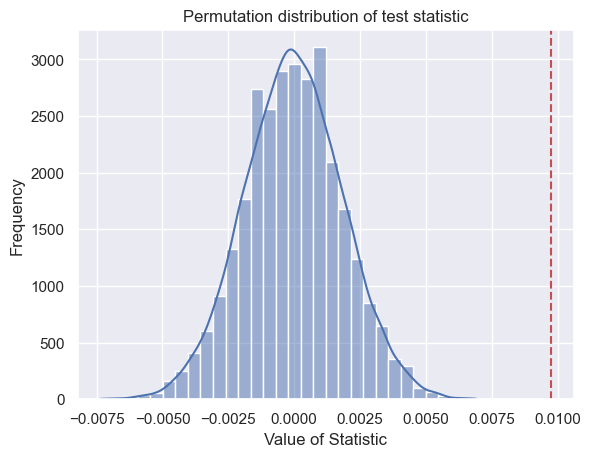

In [9]:
sns.histplot(res.null_distribution, bins=30, kde=True)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.axvline(res.statistic, 0, 1, color='r', linestyle='--')
plt.show()

In [10]:
#provo a calcolarlo manualmente

mu_diff_samples = []
# I select a subset of my dataset containing only poultry and fish data
df_temp = df
# Starting the permutations to collect the u_diff for each samples
for i in range(n):
    # extract a subsample of 50% of data without replacement
    df_sample1 = df_temp.sample(frac=0.5, replace=False)
    # use set() to get indexes of rows that were not extracted from df in previous step
    ix2 = set(df_temp.index) - set(df_sample1.index) # create dataframe with other 50% of data
    df_sample2 = df_temp.iloc[list(ix2)]
    # calculate difference in mean from each sample
    mu_diff_temp = np.mean(df_sample1.converted) - np.mean(df_sample2.converted)
    # append sampled mean difference to mu_diff_samples list
    mu_diff_samples.append(mu_diff_temp)

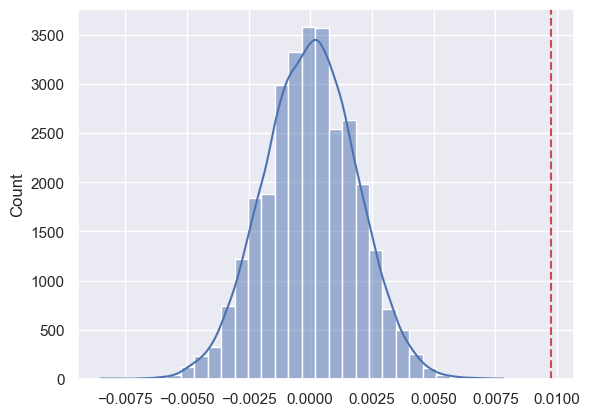

In [13]:
sns.histplot(mu_diff_samples, kde=True, bins=30)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()

In [16]:
print('Values more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
p_value = sum([el > mu_diff for el in mu_diff_samples])/n
print('p-value:', p_value)

Values more extreme than observed: 0
p-value: 0.0
